# Лабораторная работа №1
## Основы цифровой обработки сигналов на языке Python

Целью лабораторной работы является знакомство с принципами цифровой обработки сигналов на языке Python

In [1]:
# Листинг 1. Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Настройка стиля графиков
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['font.size'] = 10

## 1. Вывод на экран графиков функций

Построим графики заданного сигнала в аналоговой, дискретной и квантованной форме.

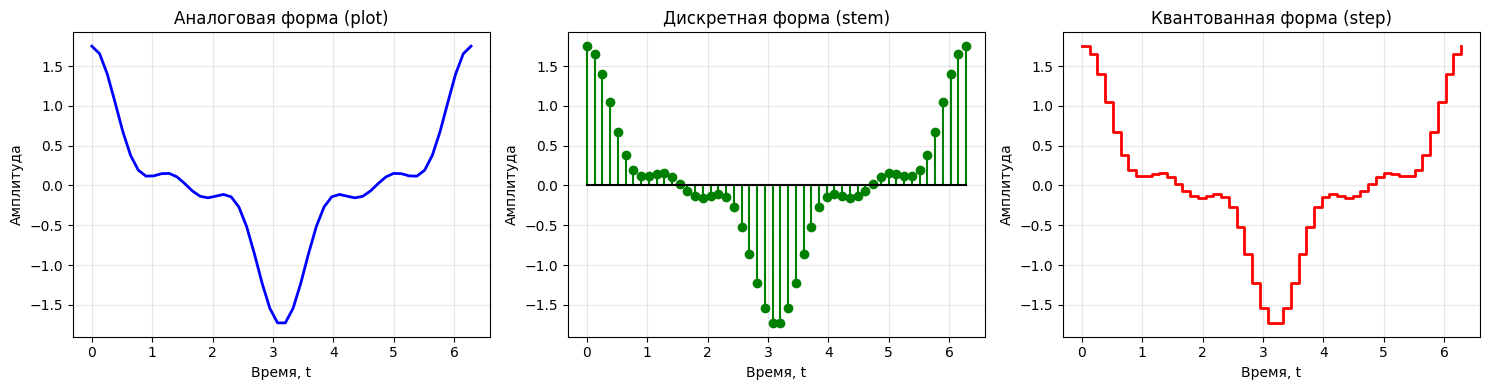

Количество отсчётов: 50


In [2]:
# Листинг 2. Вывод графиков сигнала в разных формах

# Создаём ряд временных значений
steps = 50  # Количество отсчётов
t = np.linspace(0, 2 * np.pi, steps)

# Создаём сигнал из набора гармонических колебаний
signal = np.cos(t) + 0.5 * np.cos(3 * t) + 0.25 * np.cos(5 * t)

# Создаём фигуру с тремя графиками
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Аналоговая форма (непрерывный сигнал)
axes[0].plot(t, signal, 'b-', linewidth=2)
axes[0].set_title('Аналоговая форма (plot)', fontsize=12)
axes[0].set_xlabel('Время, t')
axes[0].set_ylabel('Амплитуда')
axes[0].grid(True, alpha=0.3)

# Дискретная форма (stem)
axes[1].stem(t, signal, linefmt='g-', markerfmt='go', basefmt='k-')
axes[1].set_title('Дискретная форма (stem)', fontsize=12)
axes[1].set_xlabel('Время, t')
axes[1].set_ylabel('Амплитуда')
axes[1].grid(True, alpha=0.3)

# Квантованная форма (step)
axes[2].step(t, signal, 'r-', where='post', linewidth=2)
axes[2].set_title('Квантованная форма (step)', fontsize=12)
axes[2].set_xlabel('Время, t')
axes[2].set_ylabel('Амплитуда')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Количество отсчётов: {steps}")

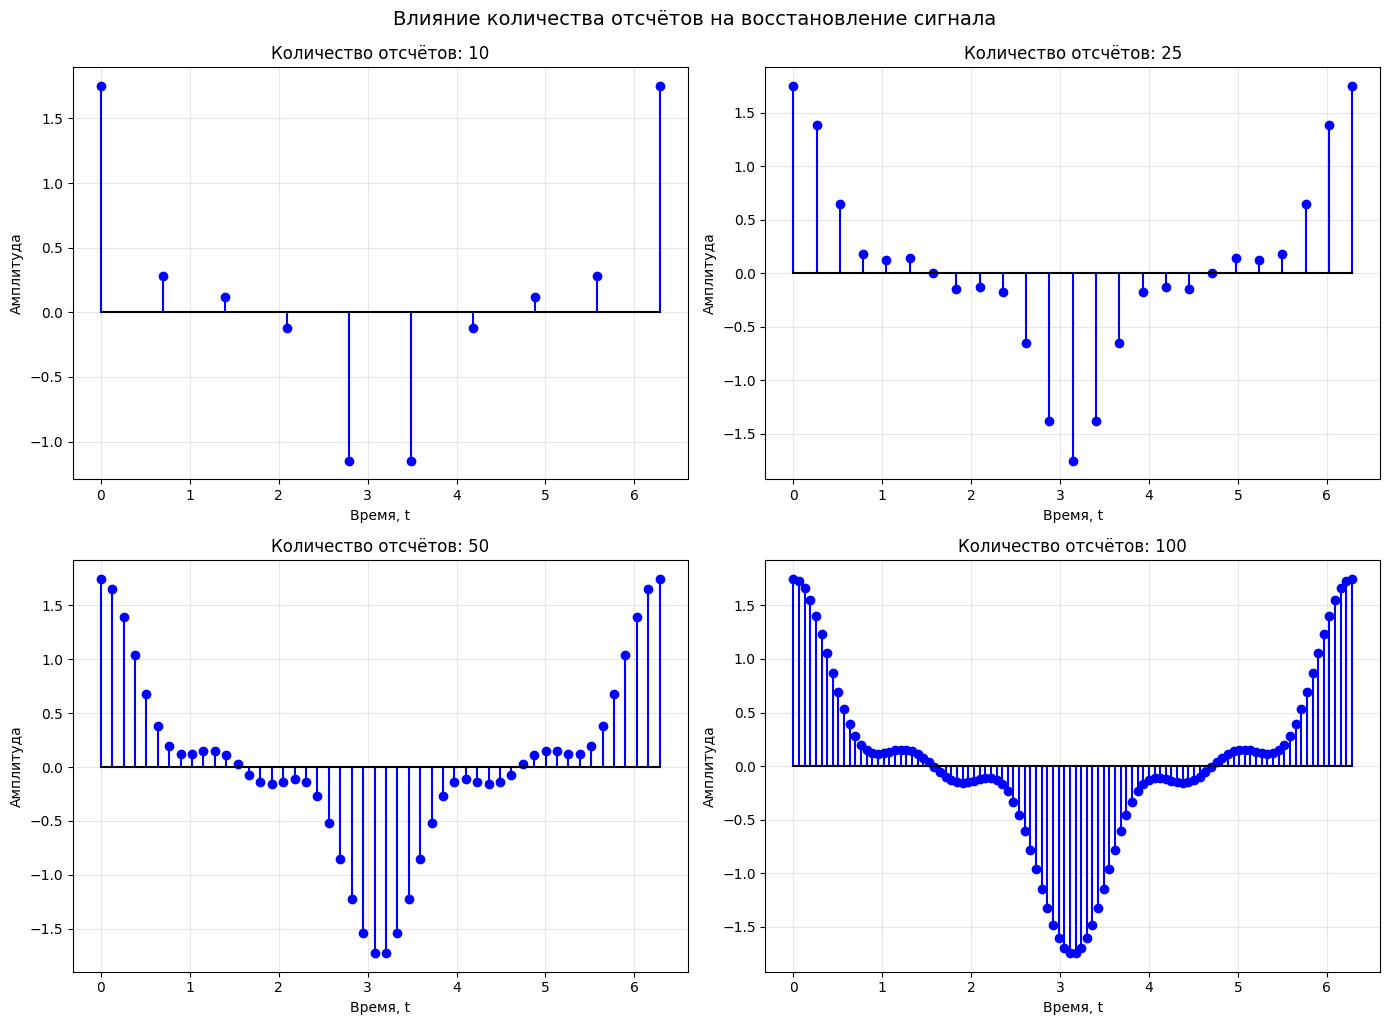

In [3]:
# Листинг 3. Влияние количества отсчётов на форму сигнала

# Попробуем разное количество отсчётов
steps_list = [10, 25, 50, 100]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, steps in enumerate(steps_list):
    t = np.linspace(0, 2 * np.pi, steps)
    signal = np.cos(t) + 0.5 * np.cos(3 * t) + 0.25 * np.cos(5 * t)
    
    axes[i].stem(t, signal, linefmt='b-', markerfmt='bo', basefmt='k-')
    axes[i].set_title(f'Количество отсчётов: {steps}', fontsize=12)
    axes[i].set_xlabel('Время, t')
    axes[i].set_ylabel('Амплитуда')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Влияние количества отсчётов на восстановление сигнала', fontsize=14, y=1.02)
plt.show()

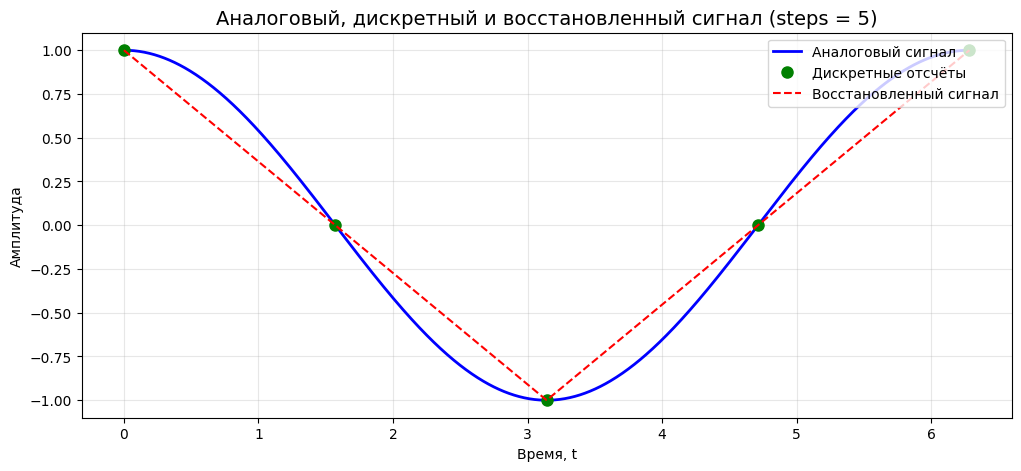

In [6]:
import numpy as np
import matplotlib.pyplot as plt

steps = 5  # Количество отсчётов для дискретизации

# Исходный аналоговый сигнал (высокое разрешение)
t_analog = np.linspace(0, 2 * np.pi, 1000)
signal_analog = np.cos(t_analog)

# Дискретный сигнал
t_discrete = np.linspace(0, 2 * np.pi, steps)
signal_discrete = np.cos(t_discrete)

# Восстановленный сигнал (интерполяция)
t_reconstructed = np.linspace(0, 2 * np.pi, 1000)
signal_reconstructed = np.interp(t_reconstructed, t_discrete, signal_discrete)

plt.figure(figsize=(12, 5))
plt.plot(t_analog, signal_analog, 'b-', linewidth=2, label='Аналоговый сигнал')
plt.plot(t_discrete, signal_discrete, 'go', markersize=8, label='Дискретные отсчёты')
plt.plot(t_reconstructed, signal_reconstructed, 'r--', linewidth=1.5, label='Восстановленный сигнал')

plt.title(f'Аналоговый, дискретный и восстановленный сигнал (steps = {steps})', fontsize=14)
plt.xlabel('Время, t')
plt.ylabel('Амплитуда')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()

## 2. Дельта-функция и функция Хевисайда

### Дельта-функция (единичный импульс)
Дельта-функция δ(n) равна единице при n = 0 и нулю при всех остальных значениях n.

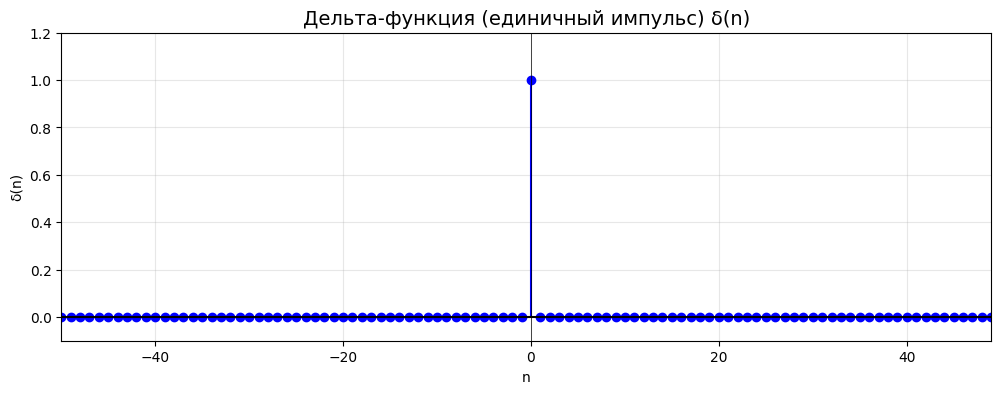

Дельта-функция: δ(0) = 1, δ(n) = 0 при n ≠ 0


In [4]:
# Листинг 4. Задание и вывод графика дельта-функции

n = 50  # Половина длины массива

# Создаём массив нулей длиной 2n
delta = np.zeros(2 * n)

# Присваиваем элементу с индексом n значение 1
delta[n] = 1

# Создаём ось x от -n до n-1
x_axis = np.arange(-n, n)

# Построение графика
plt.figure(figsize=(12, 4))
plt.stem(x_axis, delta, linefmt='b-', markerfmt='bo', basefmt='k-')
plt.title('Дельта-функция (единичный импульс) δ(n)', fontsize=14)
plt.xlabel('n')
plt.ylabel('δ(n)')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.xlim(-n, n-1)
plt.ylim(-0.1, 1.2)
plt.show()

print(f"Дельта-функция: δ(0) = 1, δ(n) = 0 при n ≠ 0")

### Функция Хевисайда (единичный скачок)
Функция Хевисайда принимает нулевые значения в отрицательной области и единичные в положительной.

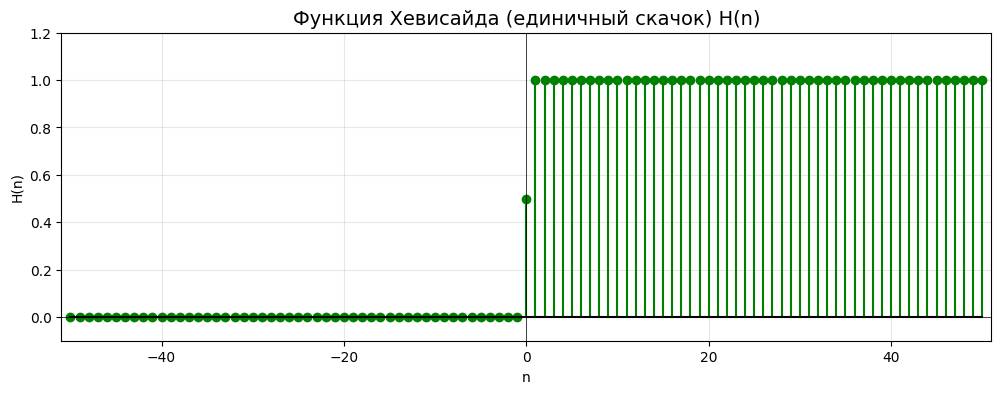

Функция Хевисайда: H(n) = 0 при n < 0, H(0) = 0.5, H(n) = 1 при n > 0


In [5]:
# Листинг 5. Задание и вывод графика функции Хевисайда

n = 50
x_axis = np.linspace(-n, n, 2 * n + 1)

# Используем функцию np.heaviside
# heaviside(x1, x2): 0 при x1 < 0, x2 при x1 == 0, 1 при x1 > 0
heaviside = np.heaviside(x_axis, 0.5)  # x2 = 0.5 (значение в точке 0)

# Построение графика
plt.figure(figsize=(12, 4))
plt.stem(x_axis, heaviside, linefmt='g-', markerfmt='go', basefmt='k-')
plt.title('Функция Хевисайда (единичный скачок) H(n)', fontsize=14)
plt.xlabel('n')
plt.ylabel('H(n)')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.xlim(-n-1, n+1)
plt.ylim(-0.1, 1.2)
plt.show()

print(f"Функция Хевисайда: H(n) = 0 при n < 0, H(0) = 0.5, H(n) = 1 при n > 0")

## 3. Быстрое преобразование Фурье (БПФ)

Выполним БПФ и построим амплитудные спектры гармонических сигналов.

In [6]:
# Листинг 6. Параметры сигнала

# Параметры сигнала
sampling_rate = 1000  # Частота дискретизации, Гц
duration = 1.0        # Длительность сигнала, с
frequency = 50        # Частота гармонического сигнала, Гц
amplitude = 1.0       # Амплитуда

# Создаём временной ряд
N = int(sampling_rate * duration)  # Количество отсчётов
t = np.linspace(0, duration, N, endpoint=False)

# Создаём гармонический сигнал
signal = amplitude * np.sin(2 * np.pi * frequency * t)

print(f"Частота дискретизации: {sampling_rate} Гц")
print(f"Длительность: {duration} с")
print(f"Количество отсчётов: {N}")
print(f"Частота сигнала: {frequency} Гц")
print(f"Амплитуда: {amplitude}")

Частота дискретизации: 1000 Гц
Длительность: 1.0 с
Количество отсчётов: 1000
Частота сигнала: 50 Гц
Амплитуда: 1.0


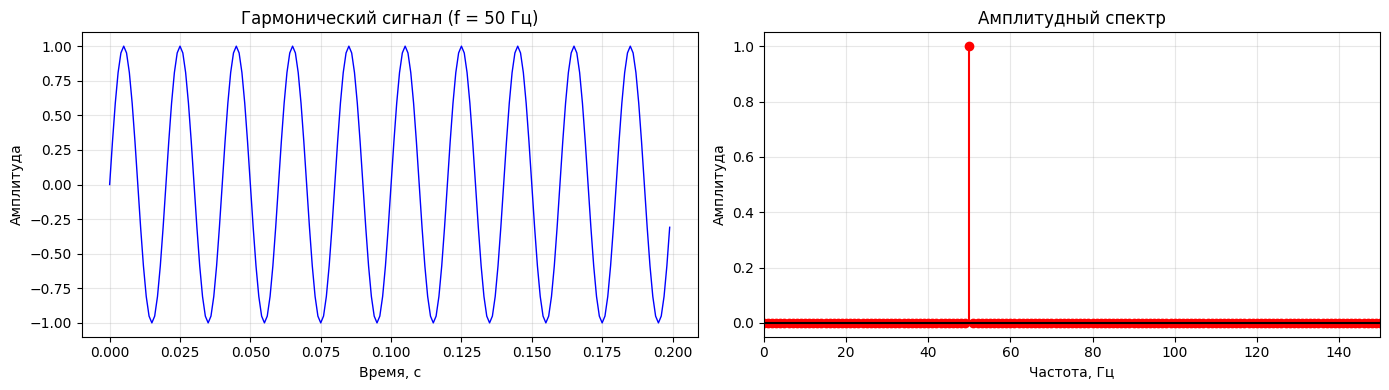

In [7]:
# Листинг 7. Построение амплитудного спектра

# Выполняем БПФ
fft_result = np.fft.fft(signal)

# Вычисляем массив частот
frequencies = np.fft.fftfreq(N, d=1/sampling_rate)

# Амплитудный спектр (модуль БПФ, нормированный)
amplitude_spectrum = np.abs(fft_result) / N

# Построение графиков
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# График сигнала во временной области
axes[0].plot(t[:200], signal[:200], 'b-', linewidth=1)
axes[0].set_title(f'Гармонический сигнал (f = {frequency} Гц)', fontsize=12)
axes[0].set_xlabel('Время, с')
axes[0].set_ylabel('Амплитуда')
axes[0].grid(True, alpha=0.3)

# Амплитудный спектр (только положительные частоты)
positive_freqs = frequencies[:N//2]
positive_spectrum = amplitude_spectrum[:N//2] * 2  # Удваиваем для односторонего спектра

axes[1].stem(positive_freqs, positive_spectrum, linefmt='r-', markerfmt='ro', basefmt='k-')
axes[1].set_title('Амплитудный спектр', fontsize=12)
axes[1].set_xlabel('Частота, Гц')
axes[1].set_ylabel('Амплитуда')
axes[1].set_xlim(0, 150)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

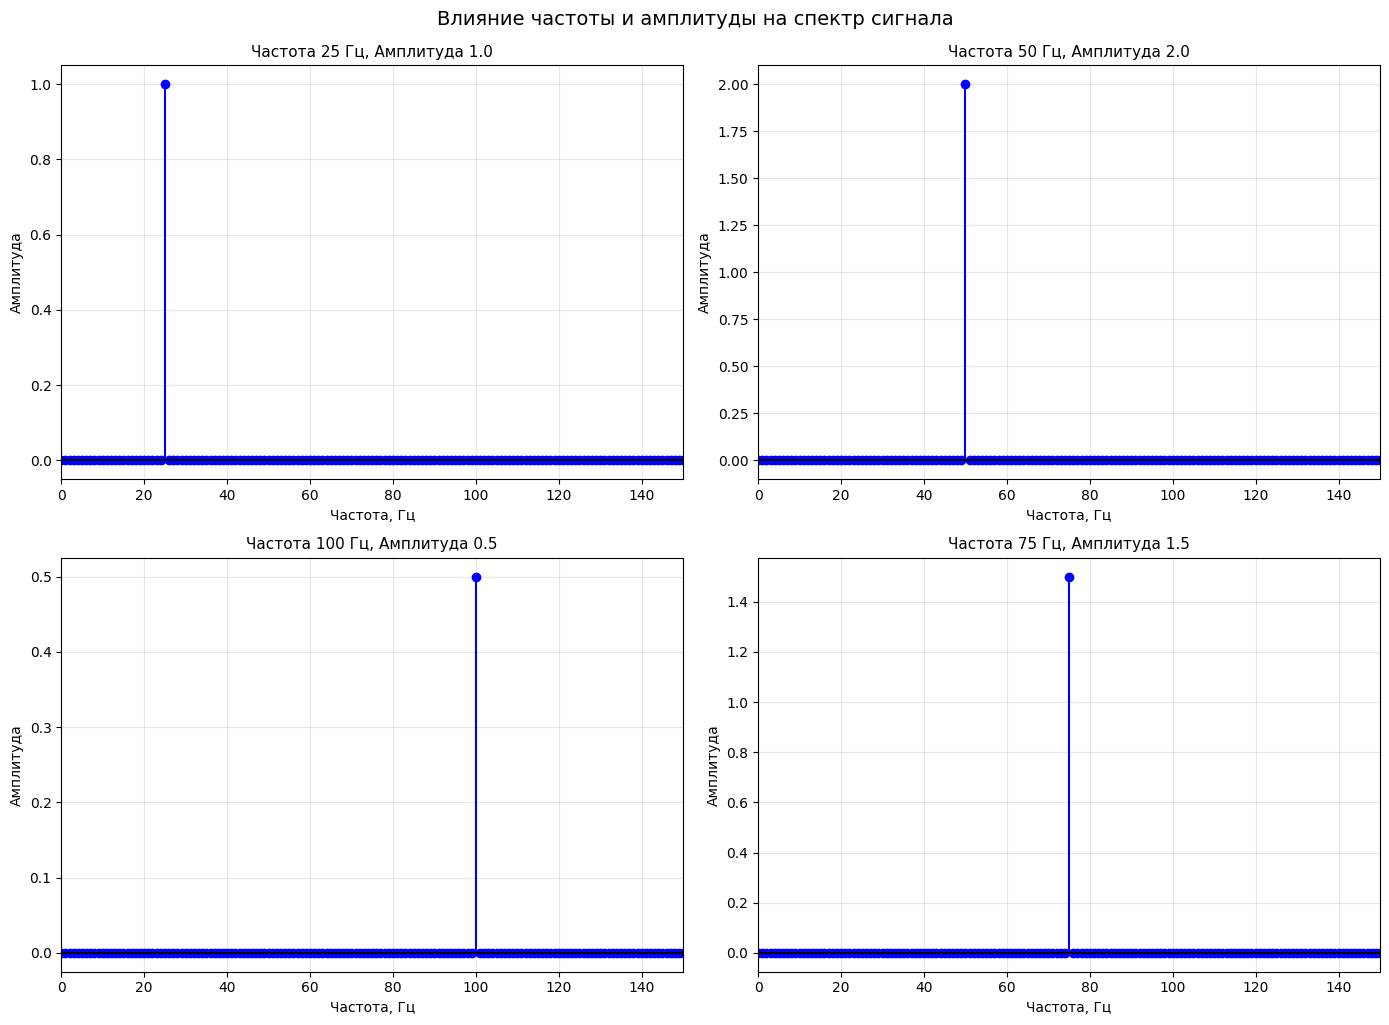

In [8]:
# Исследование: изменение частоты и амплитуды сигнала

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Разные комбинации частоты и амплитуды
params = [
    (25, 1.0, 'Частота 25 Гц, Амплитуда 1.0'),
    (50, 2.0, 'Частота 50 Гц, Амплитуда 2.0'),
    (100, 0.5, 'Частота 100 Гц, Амплитуда 0.5'),
    (75, 1.5, 'Частота 75 Гц, Амплитуда 1.5')
]

for i, (freq, amp, title) in enumerate(params):
    row, col = i // 2, i % 2
    
    # Создаём сигнал
    sig = amp * np.sin(2 * np.pi * freq * t)
    
    # БПФ
    fft_res = np.fft.fft(sig)
    spectrum = np.abs(fft_res) / N * 2
    
    # Строим спектр
    axes[row, col].stem(positive_freqs, spectrum[:N//2], 
                        linefmt='b-', markerfmt='bo', basefmt='k-')
    axes[row, col].set_title(title, fontsize=11)
    axes[row, col].set_xlabel('Частота, Гц')
    axes[row, col].set_ylabel('Амплитуда')
    axes[row, col].set_xlim(0, 150)
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Влияние частоты и амплитуды на спектр сигнала', fontsize=14, y=1.02)
plt.show()

## 4. Спектр суммы гармонических сигналов

Спектр суммы сигналов равен сумме спектров сигналов (аддитивный закон).

In [9]:
# Листинг 8. Задание сигналов

# Параметры
sampling_rate = 1000
duration = 1.0
N = int(sampling_rate * duration)
t = np.linspace(0, duration, N, endpoint=False)

# Первый сигнал: частота 30 Гц, амплитуда 1.0
f1, a1 = 30, 1.0
signal1 = a1 * np.sin(2 * np.pi * f1 * t)

# Второй сигнал: частота 70 Гц, амплитуда 0.5
f2, a2 = 70, 0.5
signal2 = a2 * np.sin(2 * np.pi * f2 * t)

# Сумма сигналов
signal3 = signal1 + signal2

print(f"Signal 1: f = {f1} Гц, A = {a1}")
print(f"Signal 2: f = {f2} Гц, A = {a2}")
print(f"Signal 3: Signal 1 + Signal 2")

Signal 1: f = 30 Гц, A = 1.0
Signal 2: f = 70 Гц, A = 0.5
Signal 3: Signal 1 + Signal 2


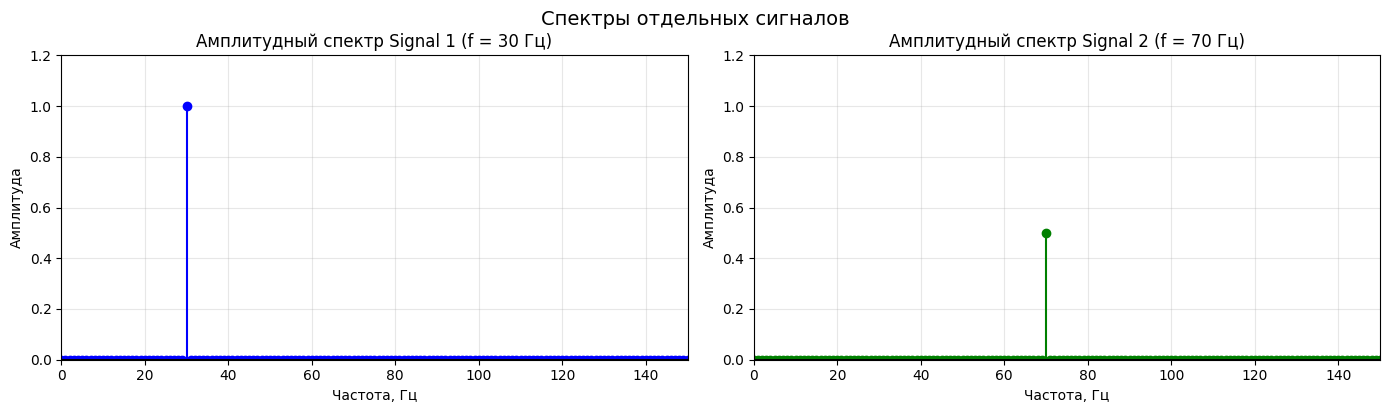

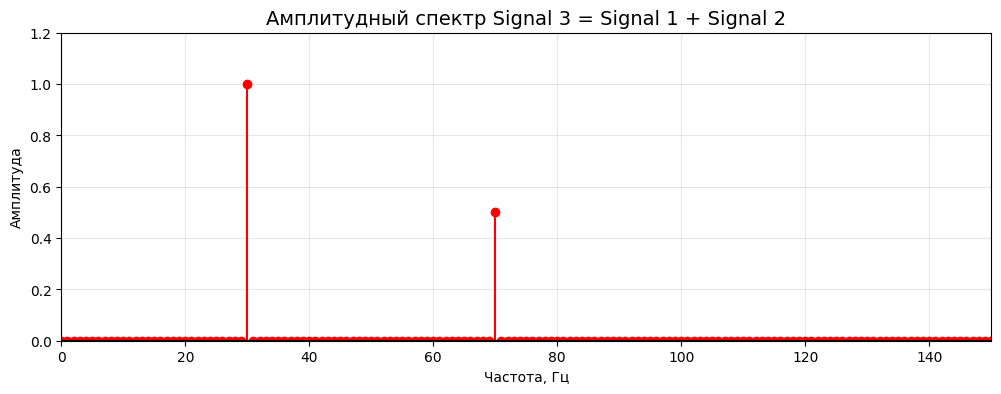


✓ Спектр суммы сигналов содержит пики на обеих частотах (30 Гц и 70 Гц)
✓ Это подтверждает аддитивный закон: спектр суммы = сумма спектров


In [10]:
# Вычисляем БПФ для всех сигналов
fft1 = np.fft.fft(signal1)
fft2 = np.fft.fft(signal2)
fft3 = np.fft.fft(signal3)

frequencies = np.fft.fftfreq(N, d=1/sampling_rate)
positive_freqs = frequencies[:N//2]

# Амплитудные спектры
spectrum1 = np.abs(fft1)[:N//2] / N * 2
spectrum2 = np.abs(fft2)[:N//2] / N * 2
spectrum3 = np.abs(fft3)[:N//2] / N * 2

# Построение графиков спектров signal1 и signal2
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].stem(positive_freqs, spectrum1, linefmt='b-', markerfmt='bo', basefmt='k-')
axes[0].set_title(f'Амплитудный спектр Signal 1 (f = {f1} Гц)', fontsize=12)
axes[0].set_xlabel('Частота, Гц')
axes[0].set_ylabel('Амплитуда')
axes[0].set_xlim(0, 150)
axes[0].set_ylim(0, 1.2)
axes[0].grid(True, alpha=0.3)

axes[1].stem(positive_freqs, spectrum2, linefmt='g-', markerfmt='go', basefmt='k-')
axes[1].set_title(f'Амплитудный спектр Signal 2 (f = {f2} Гц)', fontsize=12)
axes[1].set_xlabel('Частота, Гц')
axes[1].set_ylabel('Амплитуда')
axes[1].set_xlim(0, 150)
axes[1].set_ylim(0, 1.2)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Спектры отдельных сигналов', fontsize=14, y=1.02)
plt.show()

# Спектр суммы сигналов
plt.figure(figsize=(12, 4))
plt.stem(positive_freqs, spectrum3, linefmt='r-', markerfmt='ro', basefmt='k-')
plt.title(f'Амплитудный спектр Signal 3 = Signal 1 + Signal 2', fontsize=14)
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')
plt.xlim(0, 150)
plt.ylim(0, 1.2)
plt.grid(True, alpha=0.3)
plt.show()

print("\n✓ Спектр суммы сигналов содержит пики на обеих частотах (30 Гц и 70 Гц)")
print("✓ Это подтверждает аддитивный закон: спектр суммы = сумма спектров")

## 5. Влияние количества гармоник на форму сигнала

Рассмотрим прямоугольный сигнал и его восстановление из различного количества гармоник.

In [11]:
# Листинг 9. Задание прямоугольного сигнала и нахождение БПФ

N = 1024  # Длина сигнала

# Создаём прямоугольный сигнал единичной амплитуды
rect_signal = np.zeros(N)
rect_signal[128:320] = 1  # Сигнал равен 1 в диапазоне [128:320]

# Вычисляем БПФ
fft_rect = np.fft.fft(rect_signal)

print(f"Длина сигнала: N = {N} отсчётов")
print(f"Прямоугольный импульс: ненулевой в диапазоне [128:320]")

Длина сигнала: N = 1024 отсчётов
Прямоугольный импульс: ненулевой в диапазоне [128:320]


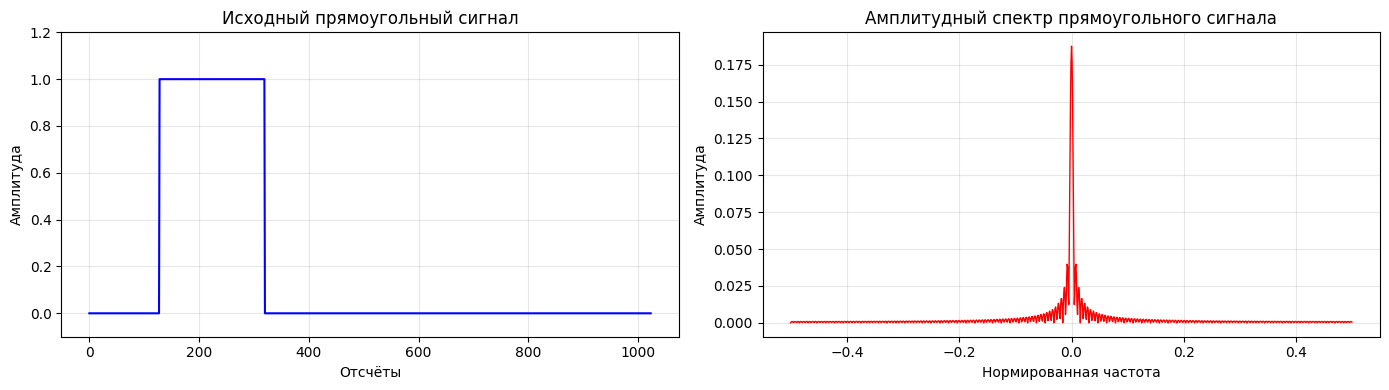

In [12]:
# Листинг 10. Вывод сигнала и его амплитудного спектра

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Исходный сигнал
axes[0].plot(rect_signal, 'b-', linewidth=1.5)
axes[0].set_title('Исходный прямоугольный сигнал', fontsize=12)
axes[0].set_xlabel('Отсчёты')
axes[0].set_ylabel('Амплитуда')
axes[0].set_ylim(-0.1, 1.2)
axes[0].grid(True, alpha=0.3)

# Амплитудный спектр
spectrum = np.abs(np.fft.fftshift(fft_rect)) / N
freq_axis = np.fft.fftshift(np.fft.fftfreq(N))

axes[1].plot(freq_axis, spectrum, 'r-', linewidth=1)
axes[1].set_title('Амплитудный спектр прямоугольного сигнала', fontsize=12)
axes[1].set_xlabel('Нормированная частота')
axes[1].set_ylabel('Амплитуда')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

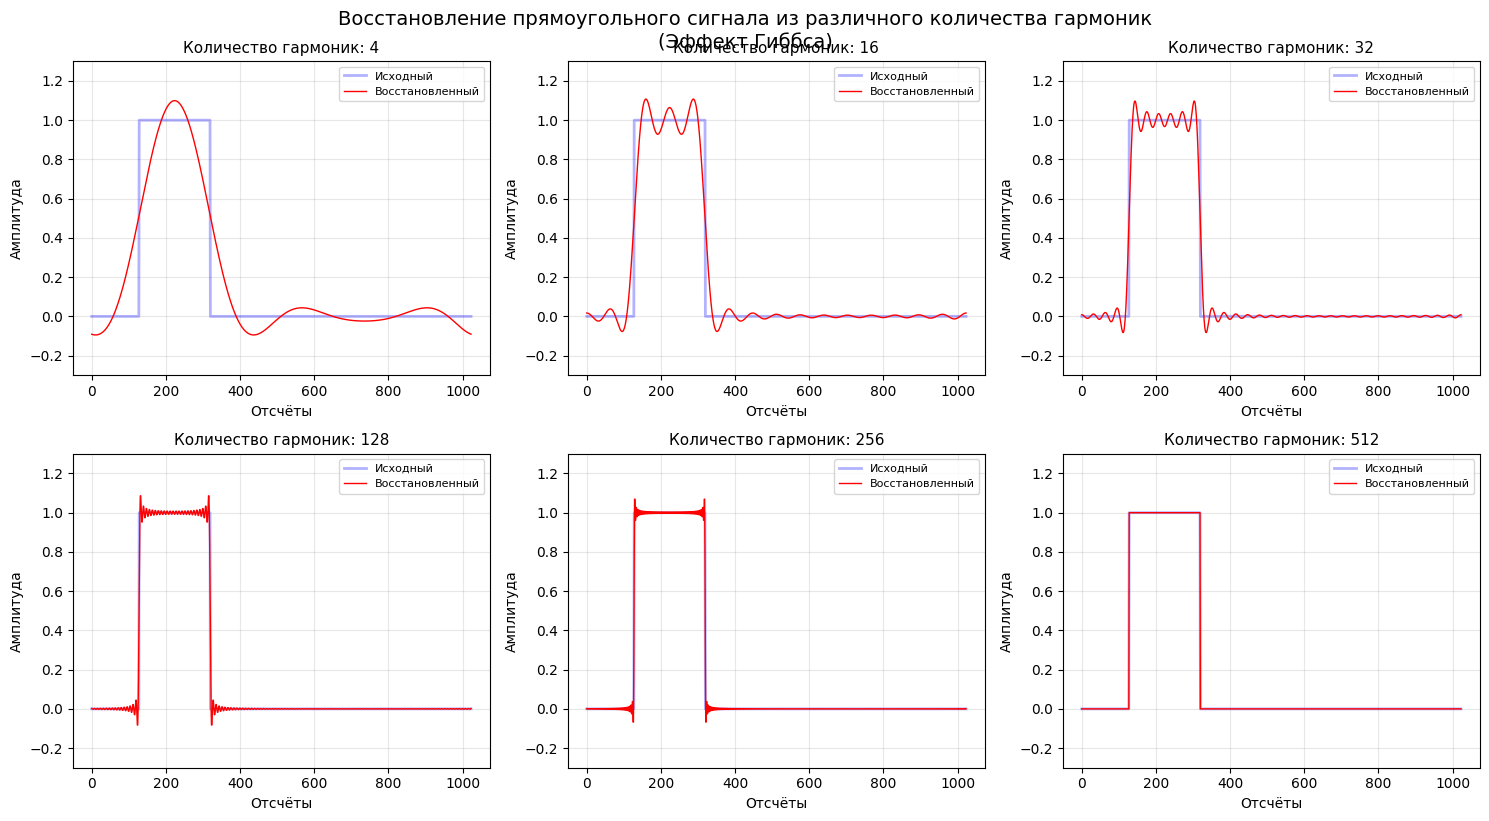

In [13]:
# Листинг 11. Восстановление сигнала из разного количества гармоник

def reconstruct_signal(fft_data, num_harmonics):
    """
    Восстанавливает сигнал из заданного количества гармоник.
    """
    N = len(fft_data)
    fft_filtered = np.zeros(N, dtype=complex)
    
    # Оставляем только num_harmonics гармоник с каждой стороны спектра
    fft_filtered[:num_harmonics] = fft_data[:num_harmonics]
    fft_filtered[-num_harmonics:] = fft_data[-num_harmonics:]
    
    # Обратное БПФ
    return np.fft.ifft(fft_filtered).real

# Различные значения количества гармоник
harmonics_list = [4, 16, 32, 128, 256, N//2]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, num_harm in enumerate(harmonics_list):
    reconstructed = reconstruct_signal(fft_rect, num_harm)
    
    axes[i].plot(rect_signal, 'b-', linewidth=2, alpha=0.3, label='Исходный')
    axes[i].plot(reconstructed, 'r-', linewidth=1, label='Восстановленный')
    axes[i].set_title(f'Количество гармоник: {num_harm}', fontsize=11)
    axes[i].set_xlabel('Отсчёты')
    axes[i].set_ylabel('Амплитуда')
    axes[i].set_ylim(-0.3, 1.3)
    axes[i].legend(loc='upper right', fontsize=8)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Восстановление прямоугольного сигнала из различного количества гармоник\n(Эффект Гиббса)', 
             fontsize=14, y=1.02)
plt.show()

### Выводы по восстановлению сигнала:

1. **4 гармоники** — форма сигнала сильно искажена, прямоугольный импульс не воспроизводится
2. **16 гармоник** — форма начинает приближаться к прямоугольной
3. **32-128 гармоник** — видны искажения на границах (эффект Гиббса)
4. **N/2 = 512 гармоник** — сигнал восстанавливается полностью

**Эффект Гиббса** — пульсации в области резких перепадов сигнала. Резкие перепады во временной области вносят вклад в высокие частоты спектра.